In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data_Online_Payment.csv')

In [6]:
df.head()

,step,type,amount,namesender,oldbalancesender,newbalancesender,namereceiver,oldbalancereceiver,newbalancereceiver,FraudStatus
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
df.shape

(1048575, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   step                1048575 non-null  int64  
 1   type                1048575 non-null  object 
 2   amount              1048575 non-null  float64
 3   namesender          1048575 non-null  object 
 4   oldbalancesender    1048575 non-null  float64
 5   newbalancesender    1048575 non-null  float64
 6   namereceiver        1048575 non-null  object 
 7   oldbalancereceiver  1048575 non-null  float64
 8   newbalancereceiver  1048575 non-null  float64
 9   FraudStatus         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [12]:
print("Categorical variables:", (df.dtypes == 'object').sum())
print("Integer variables:", (df.dtypes == 'int64').sum())
print("Float variables:", (df.dtypes == 'float64').sum())


Categorical variables: 3
Integer variables: 2
Float variables: 5


In [14]:
df.describe()

,step,amount,oldbalancesender,newbalancesender,oldbalancereceiver,newbalancereceiver,FraudStatus
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00


In [16]:
print(df.isnull().sum())

step                  0
type                  0
amount                0
namesender            0
oldbalancesender      0
newbalancesender      0
namereceiver          0
oldbalancereceiver    0
newbalancereceiver    0
FraudStatus           0
dtype: int64


In [18]:
print("Total duplicate rows:", df.duplicated().sum())


Total duplicate rows: 0


In [20]:
df.describe

<bound method NDFrame.describe of          step      type     amount   namesender  oldbalancesender  \
0           1   PAYMENT    9839.64  C1231006815         170136.00   
1           1   PAYMENT    1864.28  C1666544295          21249.00   
2           1  TRANSFER     181.00  C1305486145            181.00   
3           1  CASH_OUT     181.00   C840083671            181.00   
4           1   PAYMENT   11668.14  C2048537720          41554.00   
...       ...       ...        ...          ...               ...   
1048570    95  CASH_OUT  132557.35  C1179511630         479803.00   
1048571    95   PAYMENT    9917.36  C1956161225          90545.00   
1048572    95   PAYMENT   14140.05  C2037964975          20545.00   
1048573    95   PAYMENT   10020.05  C1633237354          90605.00   
1048574    95   PAYMENT   11450.03  C1264356443          80584.95   

         newbalancesender namereceiver  oldbalancereceiver  \
0               160296.36  M1979787155                0.00   
1            

In [22]:
df_train = df.sample(frac=0.95, random_state=42)  
df_blind_test = df.drop(df_train.index)  

# Save datasets
df_train.to_csv("training_data.csv", index=False)
df_blind_test.to_csv("blind_test_data.csv", index=False)

print("Datasets saved successfully:")
print(f"Training data: {len(df_train)} rows -> 'training_data.csv'")
print(f"Blind data: {len(df_blind_test)} rows -> 'blind_test_data.csv'")


Datasets saved successfully:
Training data: 996146 rows -> 'training_data.csv'
Blind data: 52429 rows -> 'blind_test_data.csv'


In [24]:
df_training = pd.read_csv('training_data.csv')

In [26]:
df_training

,step,type,amount,namesender,oldbalancesender,newbalancesender,namereceiver,oldbalancereceiver,newbalancereceiver,FraudStatus
0,39,TRANSFER,574748.85,C2141567696,106088.00,0.00,C883779624,0.00,574748.85,0
1,43,CASH_IN,21118.84,C696392496,10512619.91,10533738.75,C1021427324,2689219.94,2668101.10,0
2,43,CASH_IN,26551.78,C243566485,20562.93,47114.71,C1585728667,0.00,0.00,0
3,39,PAYMENT,7819.09,C662848077,0.00,0.00,M1063211872,0.00,0.00,0
4,36,CASH_OUT,312914.21,C2100965538,0.00,0.00,C1140936910,1310916.68,1623830.88,0
...,...,...,...,...,...,...,...,...,...,...
996141,20,PAYMENT,2681.38,C1890167716,0.00,0.00,M1787560341,0.00,0.00,0
996142,19,CASH_OUT,308739.58,C1178866174,205122.45,0.00,C1596969125,0.00,541673.12,0
996143,18,CASH_OUT,123332.53,C2006434903,567.00,0.00,C198045562,15479.92,138812.45,0
996144,40,TRANSFER,497878.28,C1019562207,161.00,0.00,C1920883733,0.00,497878.28,0


In [28]:
df_training.head()

,step,type,amount,namesender,oldbalancesender,newbalancesender,namereceiver,oldbalancereceiver,newbalancereceiver,FraudStatus
0,39,TRANSFER,574748.85,C2141567696,106088.00,0.00,C883779624,0.00,574748.85,0
1,43,CASH_IN,21118.84,C696392496,10512619.91,10533738.75,C1021427324,2689219.94,2668101.10,0
2,43,CASH_IN,26551.78,C243566485,20562.93,47114.71,C1585728667,0.00,0.00,0
3,39,PAYMENT,7819.09,C662848077,0.00,0.00,M1063211872,0.00,0.00,0
4,36,CASH_OUT,312914.21,C2100965538,0.00,0.00,C1140936910,1310916.68,1623830.88,0


In [30]:
df_training.shape

(996146, 10)

In [32]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996146 entries, 0 to 996145
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   step                996146 non-null  int64  
 1   type                996146 non-null  object 
 2   amount              996146 non-null  float64
 3   namesender          996146 non-null  object 
 4   oldbalancesender    996146 non-null  float64
 5   newbalancesender    996146 non-null  float64
 6   namereceiver        996146 non-null  object 
 7   oldbalancereceiver  996146 non-null  float64
 8   newbalancereceiver  996146 non-null  float64
 9   FraudStatus         996146 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.0+ MB


In [34]:
df_training.describe()

,step,amount,oldbalancesender,newbalancesender,oldbalancereceiver,newbalancereceiver,FraudStatus
count,996146.000000,9.961460e+05,9.961460e+05,9.961460e+05,9.961460e+05,9.961460e+05,996146.000000
mean,26.969686,1.587045e+05,8.734201e+05,8.932614e+05,9.784034e+05,1.114451e+06,0.001094
std,15.628085,2.649922e+05,2.969429e+06,3.005919e+06,2.296889e+06,2.416779e+06,0.033061
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,15.000000,1.215478e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,20.000000,7.639702e+04,1.601344e+04,0.000000e+00,1.265559e+05,2.182859e+05,0.000000
75%,39.000000,2.137485e+05,1.367967e+05,1.748550e+05,9.162814e+05,1.150736e+06,0.000000
max,95.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000


In [36]:
df_training.describe

<bound method NDFrame.describe of         step      type     amount   namesender  oldbalancesender  \
0         39  TRANSFER  574748.85  C2141567696         106088.00   
1         43   CASH_IN   21118.84   C696392496       10512619.91   
2         43   CASH_IN   26551.78   C243566485          20562.93   
3         39   PAYMENT    7819.09   C662848077              0.00   
4         36  CASH_OUT  312914.21  C2100965538              0.00   
...      ...       ...        ...          ...               ...   
996141    20   PAYMENT    2681.38  C1890167716              0.00   
996142    19  CASH_OUT  308739.58  C1178866174         205122.45   
996143    18  CASH_OUT  123332.53  C2006434903            567.00   
996144    40  TRANSFER  497878.28  C1019562207            161.00   
996145    16  CASH_OUT  299257.63  C1752946805            123.00   

        newbalancesender namereceiver  oldbalancereceiver  newbalancereceiver  \
0                   0.00   C883779624                0.00           

In [38]:
print(df_training.isnull().sum())

step                  0
type                  0
amount                0
namesender            0
oldbalancesender      0
newbalancesender      0
namereceiver          0
oldbalancereceiver    0
newbalancereceiver    0
FraudStatus           0
dtype: int64


In [40]:
print("Total duplicate rows:", df_training.duplicated().sum())

Total duplicate rows: 0


In [42]:
#Data Visualization # Count categorical, integer, and float columns
print("Categorical variables:", (df_training.dtypes == 'object').sum())
print("Integer variables:", (df_training.dtypes == 'int64').sum())
print("Float variables:", (df_training.dtypes == 'float64').sum())


Categorical variables: 3
Integer variables: 2
Float variables: 5


C:\Users\hp5cd\AppData\Local\Temp\ipykernel_15656\3858235946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_training["type"], palette="viridis")


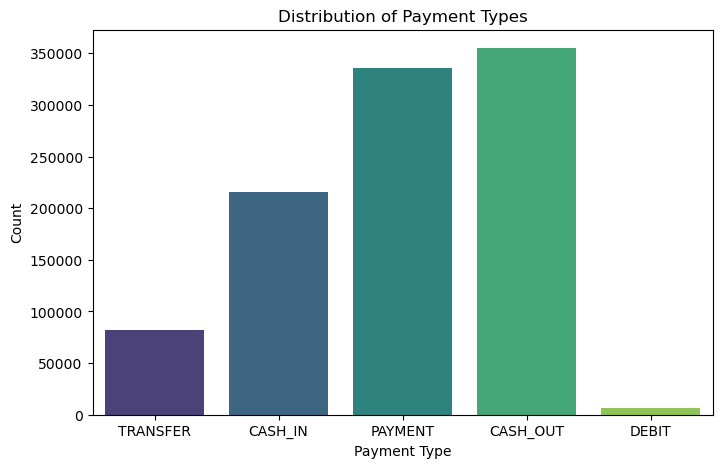

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_training["type"], palette="viridis")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_15656\3109872222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="type", y="amount", data=df_training, estimator=sum, palette="viridis")


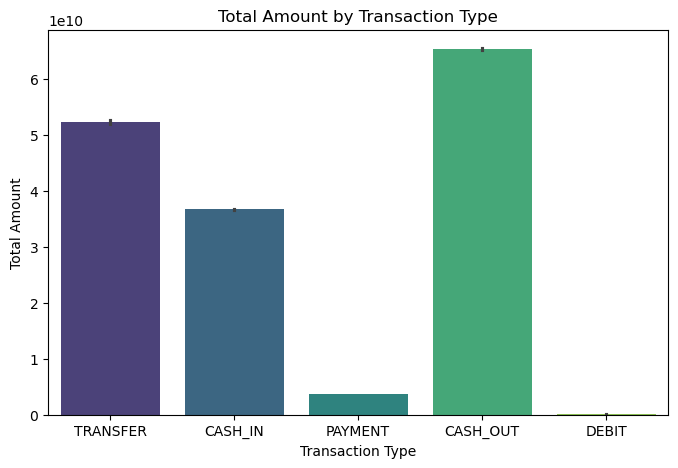

In [46]:
plt.figure(figsize=(8, 5))

# bar plot
sns.barplot(x="type", y="amount", data=df_training, estimator=sum, palette="viridis")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Total Amount by Transaction Type")
plt.show()

In [48]:
df_training['FraudStatus'].value_counts()


FraudStatus
0    995056
1      1090
Name: count, dtype: int64

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_15656\902284022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_training['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

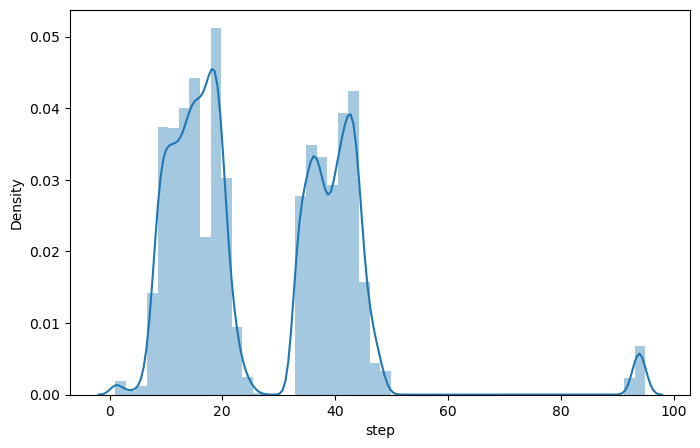

In [50]:
plt.figure(figsize=(8, 5))
sns.distplot(df_training['step'], bins=50)


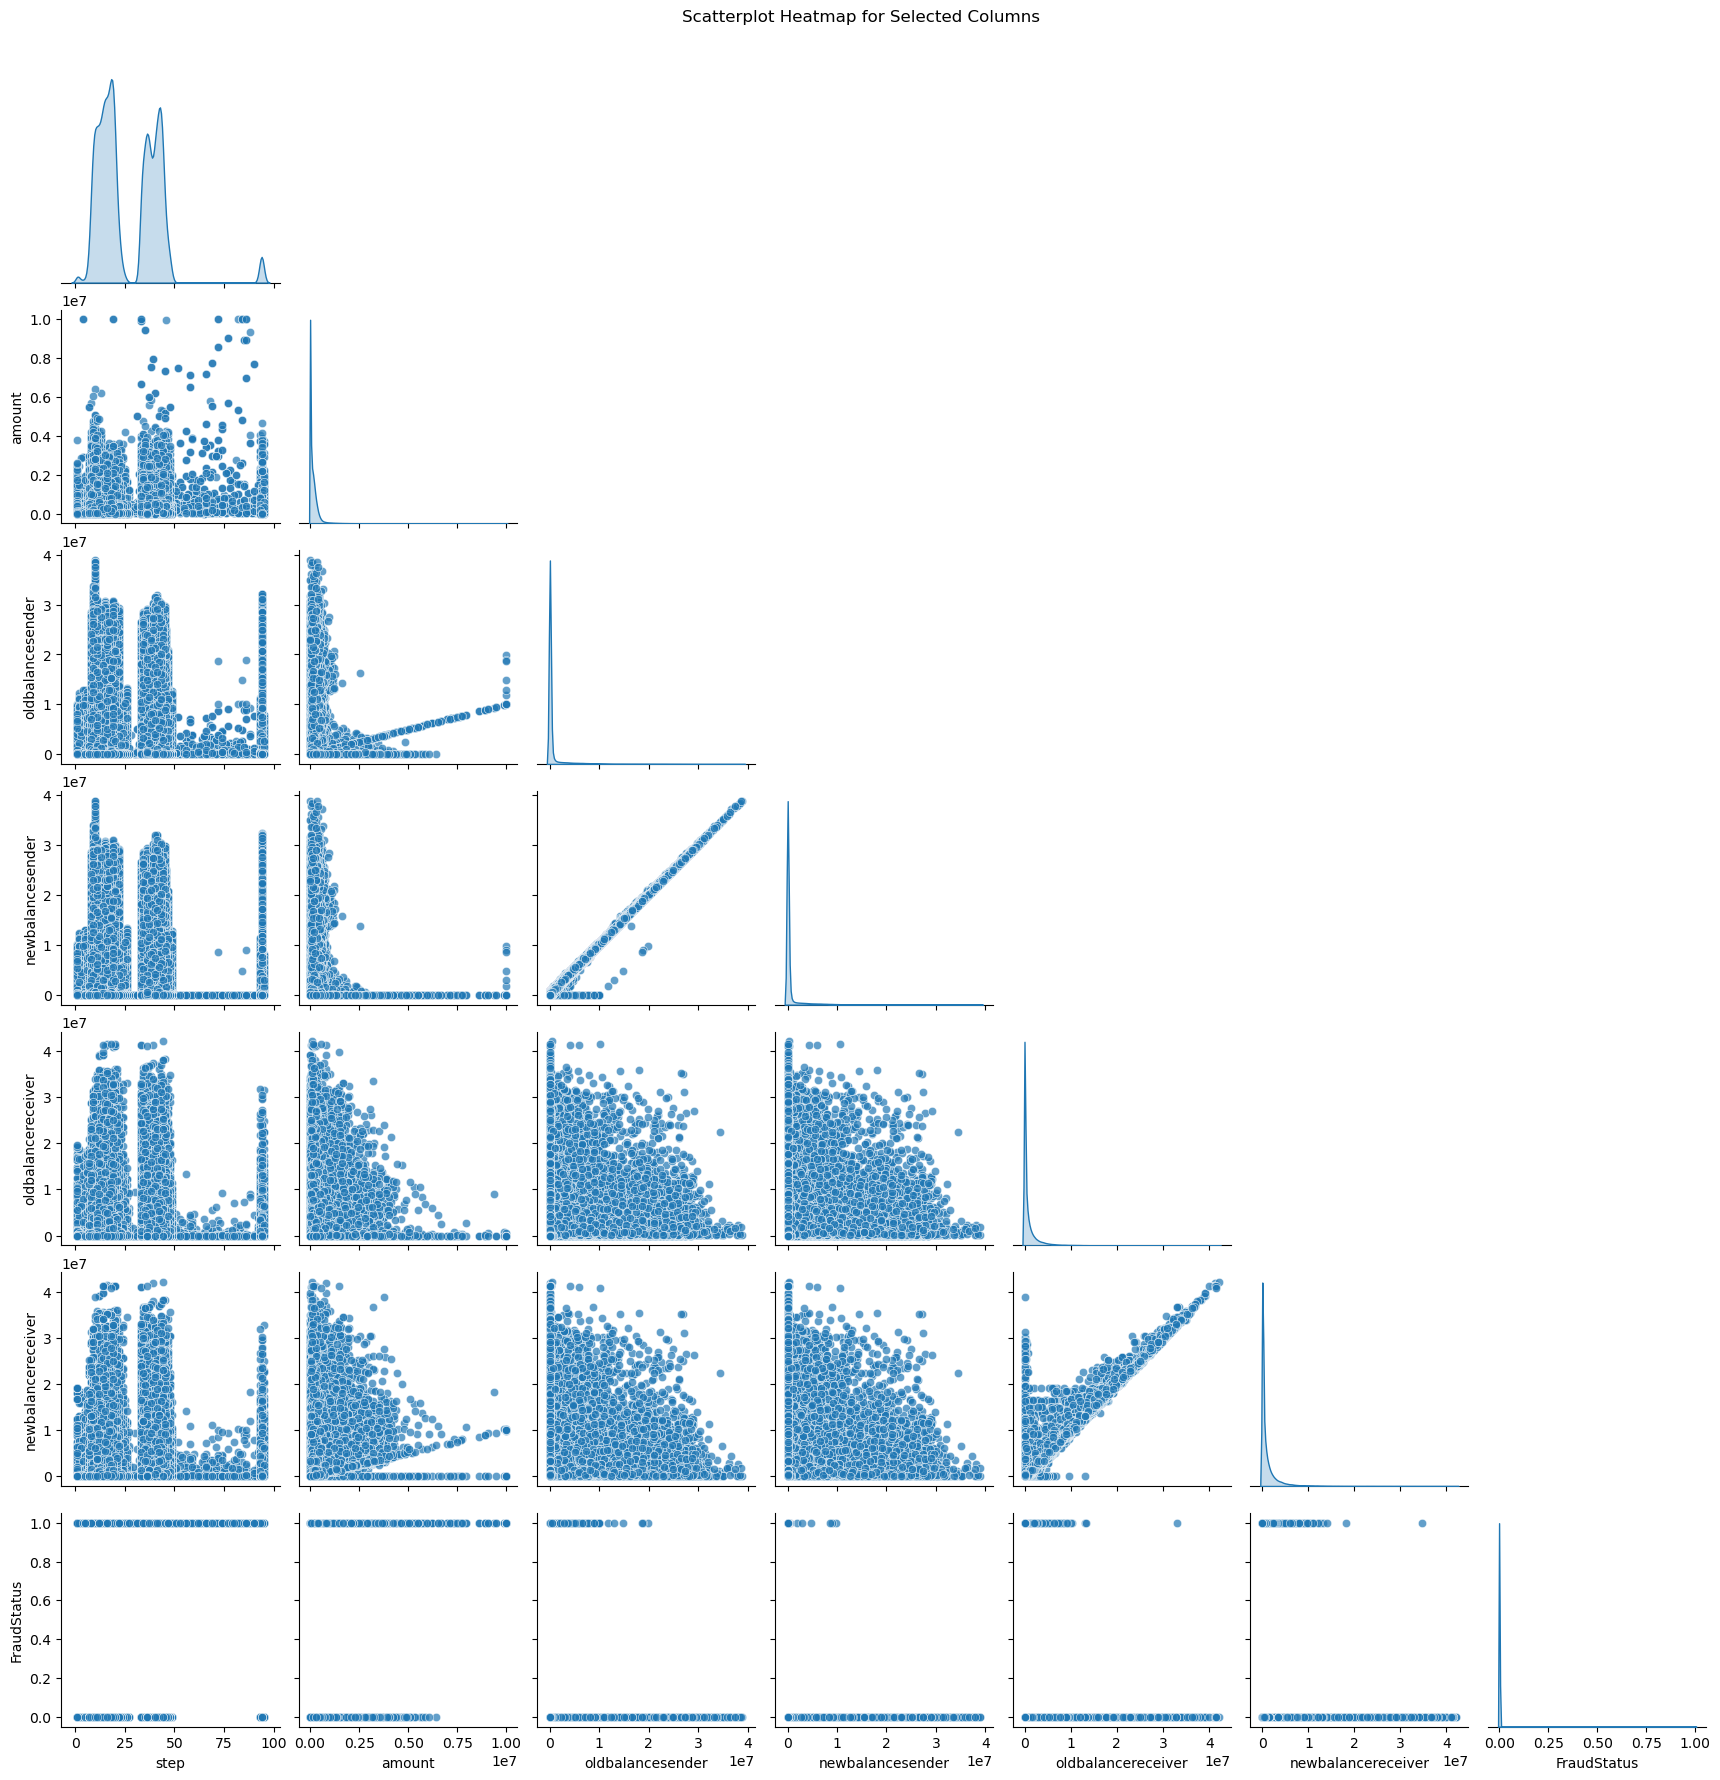

In [52]:
# scatterplot heatmap
columns_to_plot = ['step','type','amount','namesender','oldbalancesender','newbalancesender','namereceiver','oldbalancereceiver','newbalancereceiver', 'FraudStatus']
sns.pairplot(df_training[columns_to_plot], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Scatterplot Heatmap for Selected Columns", y=1.02)
plt.show()
 

<Axes: >

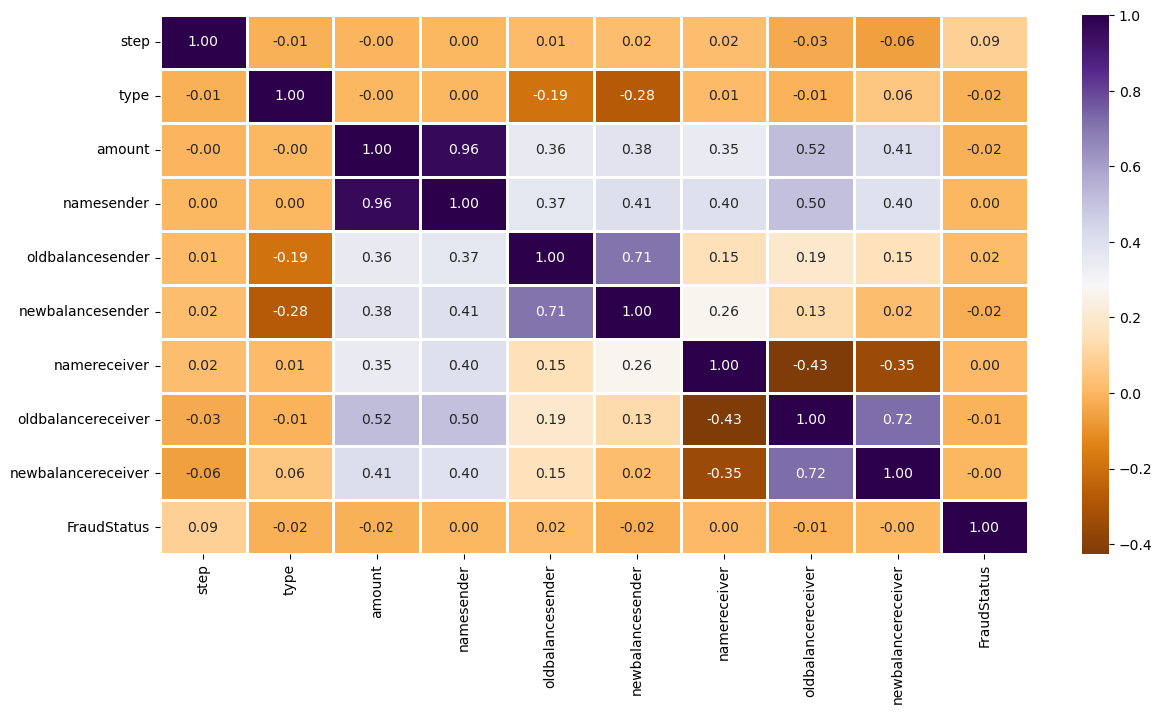

In [58]:
plt.figure(figsize=(14, 7))
sns.heatmap(df_training.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap='PuOr',
            fmt='.2f',
            linewidths=2,
            annot=True)


In [60]:
type_new = pd.get_dummies(df_training['type'], drop_first=True)
df_training1 = pd.concat([df_training, type_new], axis=1)
df_training1.head()



,step,type,amount,namesender,oldbalancesender,newbalancesender,namereceiver,oldbalancereceiver,newbalancereceiver,FraudStatus,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,39,TRANSFER,574748.85,C2141567696,106088.00,0.00,C883779624,0.00,574748.85,0,False,False,False,True
1,43,CASH_IN,21118.84,C696392496,10512619.91,10533738.75,C1021427324,2689219.94,2668101.10,0,False,False,False,False
2,43,CASH_IN,26551.78,C243566485,20562.93,47114.71,C1585728667,0.00,0.00,0,False,False,False,False
3,39,PAYMENT,7819.09,C662848077,0.00,0.00,M1063211872,0.00,0.00,0,False,False,True,False
4,36,CASH_OUT,312914.21,C2100965538,0.00,0.00,C1140936910,1310916.68,1623830.88,0,True,False,False,False


In [100]:
X = df_training1.drop(['FraudStatus', 'type', 'namesender', 'namereceiver'], axis=1)
y = df_training1['FraudStatus']


In [102]:
X.shape, y.shape


((996146, 10), (996146,))

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)



In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [140]:
#Logistic Regression 
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

train_preds = log_reg.predict_proba(X_train)[:, 1]
print('Logistic Regression:')
print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = log_reg.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()


C:\Users\hp5cd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Training Accuracy :  0.8373263959964617
Validation Accuracy :  0.8632359557828249



In [142]:
#XGB CLassifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

train_preds = xgb_model.predict_proba(X_train)[:, 1]
print('XGBClassifier:')
print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = xgb_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()


XGBClassifier:
Training Accuracy :  0.9999951997838497
Validation Accuracy :  0.99834839832202



In [144]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
rf_model.fit(X_train, y_train)
train_preds = rf_model.predict_proba(X_train)[:, 1]
print('RandomForestClassifier:')
print('Training Accuracy : ', ras(y_train, train_preds))
y_preds = rf_model.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()


RandomForestClassifier:
Training Accuracy :  0.9999987320183754
Validation Accuracy :  0.9361432813286923



In [146]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
}

# Store results for comparison
results = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Training predictions and accuracy
    train_preds = model.predict_proba(X_train)[:, 1]
    train_accuracy = ras(y_train, train_preds)
    
    # Validation predictions and accuracy
    val_preds = model.predict_proba(X_test)[:, 1]
    val_accuracy = ras(y_test, val_preds)
    
    # Store the results
    results[model_name] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}
    
    # Print the accuracy results
    print(f'{model_name} : ')
    print(f'Training Accuracy : {train_accuracy}')
    print(f'Validation Accuracy : {val_accuracy}')
    print()

# Find the model with the highest validation accuracy
best_model_name = max(results, key=lambda x: results[x]['val_accuracy'])
best_model = models[best_model_name]

# Output the best model
print(f'Best model based on validation accuracy: {best_model_name}')
print(f'Validation Accuracy: {results[best_model_name]["val_accuracy"]}')


C:\Users\hp5cd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 
Training Accuracy : 0.8373263959964617
Validation Accuracy : 0.8632359557828249

XGBClassifier : 
Training Accuracy : 0.9999951997838497
Validation Accuracy : 0.99834839832202

RandomForestClassifier : 
Training Accuracy : 0.9999987320183754
Validation Accuracy : 0.9361432813286923

Best model based on validation accuracy: XGBClassifier
Validation Accuracy: 0.99834839832202


In [154]:
import joblib

# Save the XGBClassifier model
joblib.dump(best_model, 'best_xgb_model.pkl')

print('XGBClassifier model saved best_xgb_model.pkl')


XGBClassifier model saved best_xgb_model.pkl
